In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns 


%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

匯入data

In [3]:
x = np.genfromtxt('preprocessed_x.csv', delimiter=',')
y = np.genfromtxt('preprocessed_y.csv', delimiter=',', dtype= None)

RandomForestClassifier
                   precision    recall  f1-score   support

      b'bathroom'       0.67      0.29      0.40         7
       b'driving'       0.67      0.24      0.36        33
        b'eating'       0.00      0.00      0.00        45
         b'lying'       0.72      0.28      0.40        47
        b'riding'       0.00      0.00      0.00         2
       b'sitting'       0.63      0.88      0.74       216
      b'standing'       0.00      0.00      0.00         2
b'using_computer'       0.80      0.96      0.87       232
       b'walking'       1.00      0.04      0.07        28

         accuracy                           0.71       612
        macro avg       0.50      0.30      0.31       612
     weighted avg       0.67      0.71      0.65       612



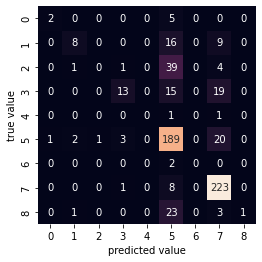

In [4]:
rf = RandomForestClassifier(n_estimators = 200)


fin_test = np.array([])
fin_pred = np.array([])

for i,(train, test) in enumerate(KFold(n_splits=3).split(x)):
    #Train-Test-Split
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]
    
    rf.fit(x_train, y_train)

    fin_test = np.concatenate((fin_test, y_test), axis=0)
    fin_pred = np.concatenate((fin_pred, rf.predict(x_test)), axis=0)
    
print("RandomForestClassifier")
print(classification_report(fin_test, fin_pred))

sns.heatmap(confusion_matrix(fin_test, fin_pred), square= True, fmt ='.0f', annot=True, cbar=False)

plt.xlabel("predicted value")
plt.ylabel("true value")
plt.show()
